In [1]:
# Cella 1: Installazione (se necessario)
# !pip install qiskit==2.2.0
# !pip install qiskit-aer
# !pip install matplotlib

In [2]:
# Cella 2: Import delle librerie
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Configura matplotlib per Jupyter
%matplotlib inline

Stato Generico
θ = 1.047 rad (60.0°)
φ = 0.785 rad (45.0°)
|ψ⟩ = (0.866 + 0.000i)|0⟩ + (0.354 + 0.354i)|1⟩
P(|0⟩) = 0.7500, P(|1⟩) = 0.2500



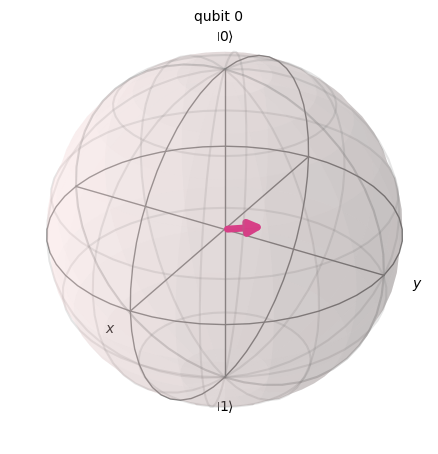

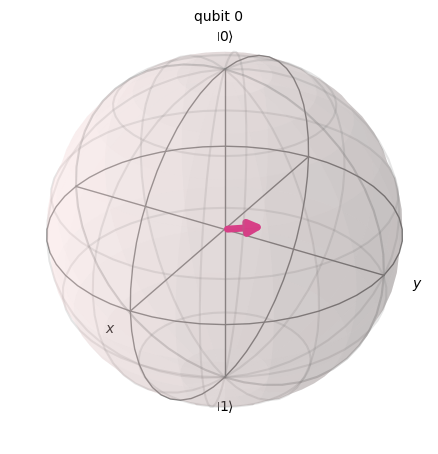

In [3]:
# Cella 3: Funzione per creare e disegnare uno stato generico
def create_and_draw_state(theta, phi, label=""):
    """
    Crea e visualizza uno stato generico sulla sfera di Bloch.
    
    Parametri:
        theta (float): Angolo polare (0 ≤ θ ≤ π)
        phi (float): Angolo azimutale (0 ≤ φ < 2π)
        label (str): Etichetta per il plot
    
    Returns:
        Statevector: Lo stato quantistico creato
    """
    # Crea lo stato: |ψ⟩ = cos(θ/2)|0⟩ + e^(iφ)sin(θ/2)|1⟩
    alpha = np.cos(theta / 2)
    beta = np.exp(1j * phi) * np.sin(theta / 2)
    psi = Statevector([alpha, beta])
    
    # Disegna sulla sfera di Bloch usando il metodo draw()
    print(f"{label}")
    print(f"θ = {theta:.3f} rad ({np.degrees(theta):.1f}°)")
    print(f"φ = {phi:.3f} rad ({np.degrees(phi):.1f}°)")
    print(f"|ψ⟩ = ({alpha.real:.3f} + {alpha.imag:.3f}i)|0⟩ + ({beta.real:.3f} + {beta.imag:.3f}i)|1⟩")
    print(f"P(|0⟩) = {np.abs(alpha)**2:.4f}, P(|1⟩) = {np.abs(beta)**2:.4f}\n")
    
    # Usa il metodo draw() con output 'bloch'
    return psi.draw('bloch')

# Esempio
create_and_draw_state(np.pi/3, np.pi/4, "Stato Generico")

Stato con θ=0.785, φ=0.524


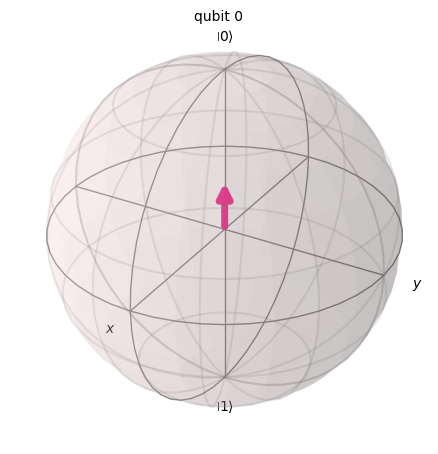

In [4]:
# Cella 4: Stato generico personalizzabile
# Modifica questi valori
theta = np.pi / 4  # 45 gradi
phi = np.pi / 6    # 30 gradi

# Crea lo stato
alpha = np.cos(theta / 2)
beta = np.exp(1j * phi) * np.sin(theta / 2)
state = Statevector([alpha, beta])

# Disegna sulla sfera di Bloch
print(f"Stato con θ={theta:.3f}, φ={phi:.3f}")
state.draw('bloch')

STATI COMPUTAZIONALI DI BASE

Stato |0⟩:




Stato |1⟩:


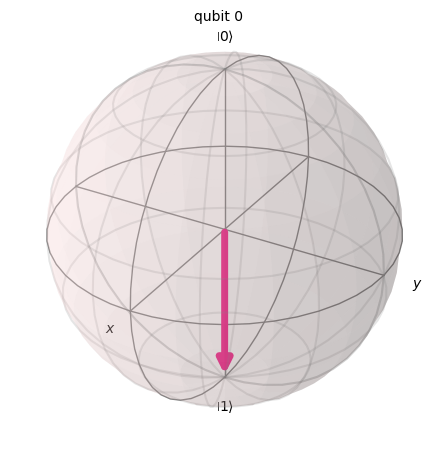

In [5]:
# Cella 5: Stati computazionali di base
print("STATI COMPUTAZIONALI DI BASE\n")

# Stato |0⟩
print("Stato |0⟩:")
state_0 = Statevector([1, 0])
display(state_0.draw('bloch'))

print("\n" + "="*60 + "\n")

# Stato |1⟩
print("Stato |1⟩:")
state_1 = Statevector([0, 1])
display(state_1.draw('bloch'))

STATI DI SUPERPOSIZIONE

Stato |+⟩ = (|0⟩ + |1⟩)/√2:


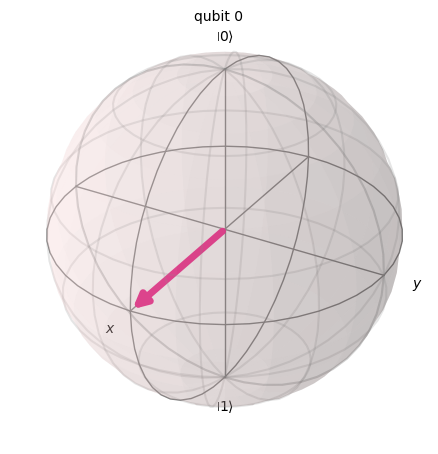



Stato |-⟩ = (|0⟩ - |1⟩)/√2:


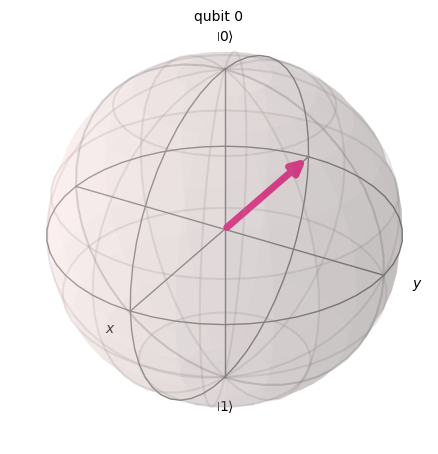

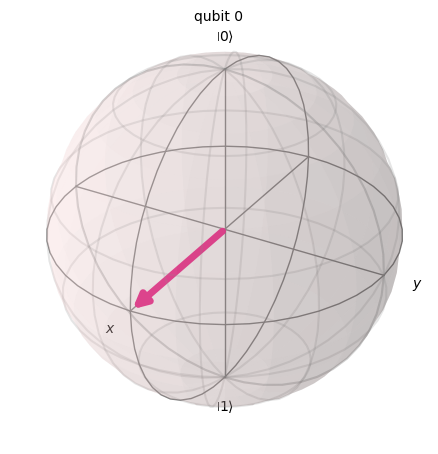

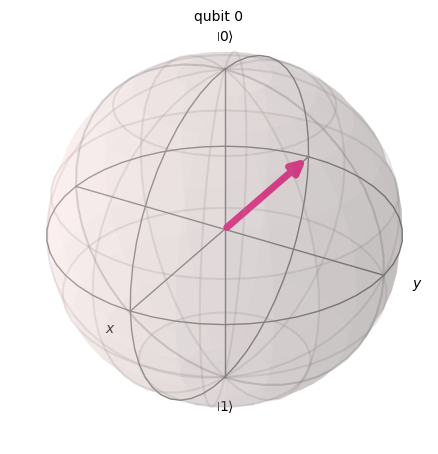

In [6]:
# Cella 6: Stati di superposizione (Hadamard basis)
print("STATI DI SUPERPOSIZIONE\n")

# Stato |+⟩
print("Stato |+⟩ = (|0⟩ + |1⟩)/√2:")
state_plus = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
display(state_plus.draw('bloch'))

print("\n" + "="*60 + "\n")

# Stato |-⟩
print("Stato |-⟩ = (|0⟩ - |1⟩)/√2:")
state_minus = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])
display(state_minus.draw('bloch'))

STATI CIRCOLARI

Stato |+i⟩ = (|0⟩ + i|1⟩)/√2:




Stato |-i⟩ = (|0⟩ - i|1⟩)/√2:


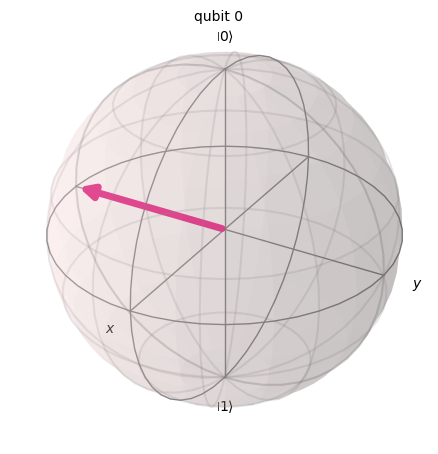

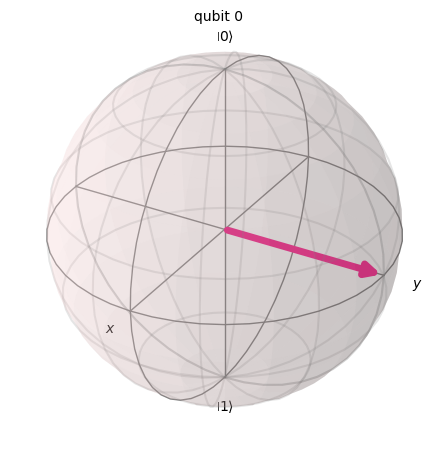

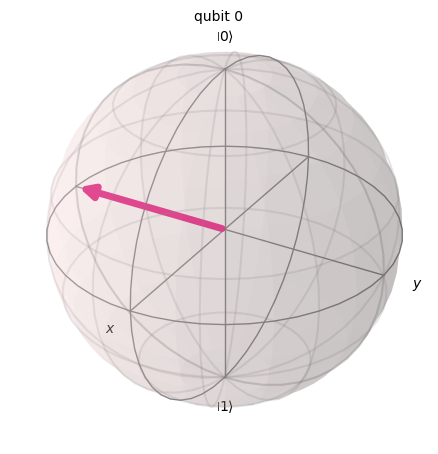

In [7]:
# Cella 7: Stati circolari (Y basis)
print("STATI CIRCOLARI\n")

# Stato |+i⟩
print("Stato |+i⟩ = (|0⟩ + i|1⟩)/√2:")
state_plusi = Statevector([1/np.sqrt(2), 1j/np.sqrt(2)])
display(state_plusi.draw('bloch'))

print("\n" + "="*60 + "\n")

# Stato |-i⟩
print("Stato |-i⟩ = (|0⟩ - i|1⟩)/√2:")
state_minusi = Statevector([1/np.sqrt(2), -1j/np.sqrt(2)])
display(state_minusi.draw('bloch'))

STATI CREATI CON CIRCUITI QUANTISTICI

Circuito per |+⟩:


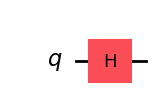


Stato risultante sulla sfera di Bloch:


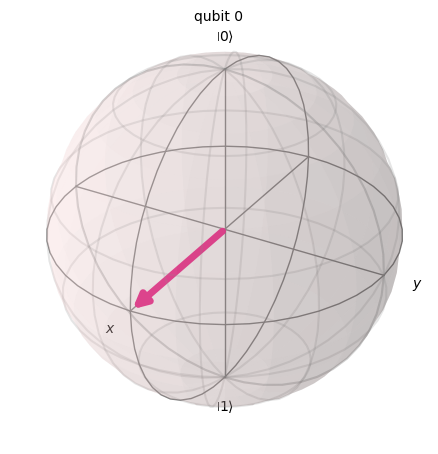

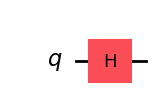

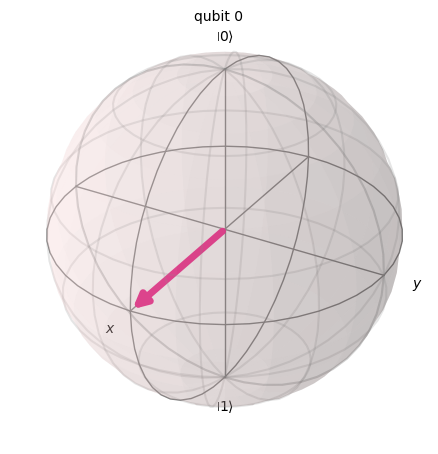

In [8]:
# Cella 8: Creare stati usando circuiti quantistici e disegnare
print("STATI CREATI CON CIRCUITI QUANTISTICI\n")

# Stato |+⟩ usando Hadamard
qc_plus = QuantumCircuit(1)
qc_plus.h(0)
print("Circuito per |+⟩:")
display(qc_plus.draw('mpl'))

# Ottieni e disegna lo stato
state_plus = Statevector(qc_plus)
print("\nStato risultante sulla sfera di Bloch:")
display(state_plus.draw('bloch'))

Rotazione generica con U(π/3, π/4, 0):

Circuito:


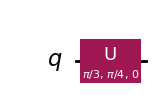


Stato risultante:
Coefficienti: [0.8660254 +0.j         0.35355339+0.35355339j]


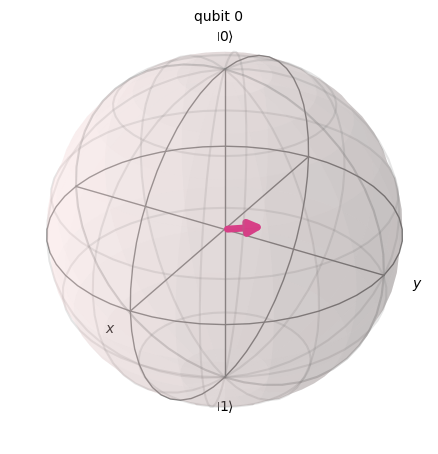

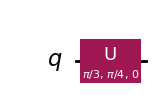

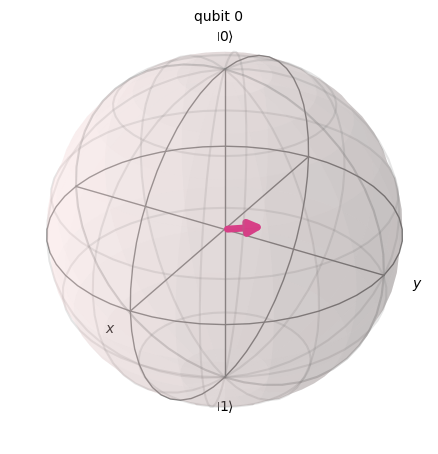

In [9]:
# Cella 9: Rotazioni generiche usando circuiti
def create_state_with_circuit(theta, phi, lambda_param=0):
    """
    Crea uno stato usando una porta U generico.
    
    Parametri:
        theta, phi, lambda_param: Parametri della porta U
    """
    qc = QuantumCircuit(1)
    qc.u(theta, phi, lambda_param, 0)
    
    print("Circuito:")
    display(qc.draw('mpl'))
    
    # Ottieni lo stato e disegnalo
    state = Statevector(qc)
    print(f"\nStato risultante:")
    print(f"Coefficienti: {state.data}")
    
    return state.draw('bloch')

# Esempio
print("Rotazione generica con U(π/3, π/4, 0):\n")
create_state_with_circuit(np.pi/3, np.pi/4, 0)

SEQUENZA DI ROTAZIONI

Circuito:


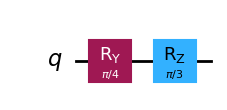


Stato finale sulla sfera di Bloch:


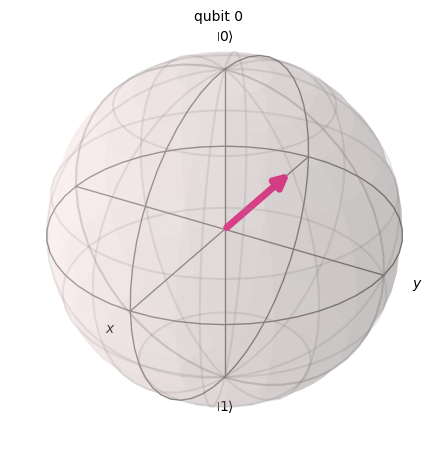


Rappresentazione LaTeX dello stato:


<IPython.core.display.Latex object>

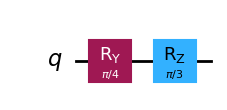

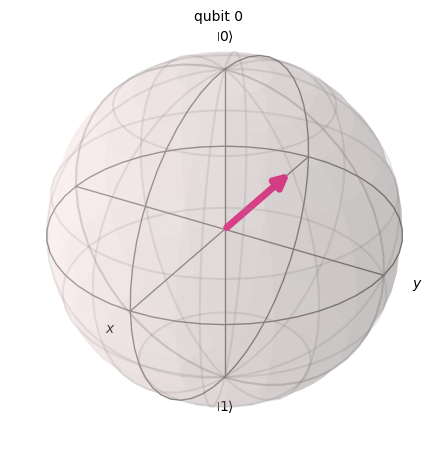

In [10]:
# Cella 10: Sequenza di rotazioni
print("SEQUENZA DI ROTAZIONI\n")

# Crea circuito con rotazioni successive
qc = QuantumCircuit(1)
qc.ry(np.pi/4, 0)  # Rotazione attorno Y
qc.rz(np.pi/3, 0)  # Rotazione attorno Z

print("Circuito:")
display(qc.draw('mpl'))

# Visualizza stato finale
state = Statevector(qc)
print("\nStato finale sulla sfera di Bloch:")
display(state.draw('bloch'))

# Mostra anche rappresentazione testuale
print("\nRappresentazione LaTeX dello stato:")
display(state.draw('latex'))

In [11]:
import subprocess
result = subprocess.run(['pdflatex', '--version'], capture_output=True, text=True)
print(result.stdout if result.returncode == 0 else "pdflatex NON trovato")

pdfTeX 3.141592653-2.6-1.40.22 (TeX Live 2022/dev/Debian)
kpathsea version 6.3.4/dev
Copyright 2021 Han The Thanh (pdfTeX) et al.
There is NO warranty.  Redistribution of this software is
covered by the terms of both the pdfTeX copyright and
the Lesser GNU General Public License.
For more information about these matters, see the file
named COPYING and the pdfTeX source.
Primary author of pdfTeX: Han The Thanh (pdfTeX) et al.
Compiled with libpng 1.6.37; using libpng 1.6.37
Compiled with zlib 1.2.11; using zlib 1.2.12
Compiled with xpdf version 4.03



In [12]:
result = subprocess.run(['dvipng', '--version'], capture_output=True, text=True)
print(result.stdout if result.returncode == 0 else "dvipng NON trovato")

This is dvipng 1.15 Copyright 2002-2015 Jan-Ake Larsson
dvipng 1.15
kpathsea version 6.3.1/dev
Compiled with Freetype 2.8.1
Using libft 2.11.0
Copyright (C) 2002-2015 Jan-Ake Larsson.
There is NO warranty.  You may redistribute this software
under the terms of the GNU Lesser General Public License
version 3, see the COPYING file in the dvipng distribution
or <http://www.gnu.org/licenses/>.



CONFRONTO STATI SULLA SFERA DI BLOCH

|0⟩:
Coefficienti: α = 1.000+0.000j, β = 0.000+0.000j


----------------------------------------------------------------------

|1⟩:
Coefficienti: α = 0.000+0.000j, β = 1.000+0.000j


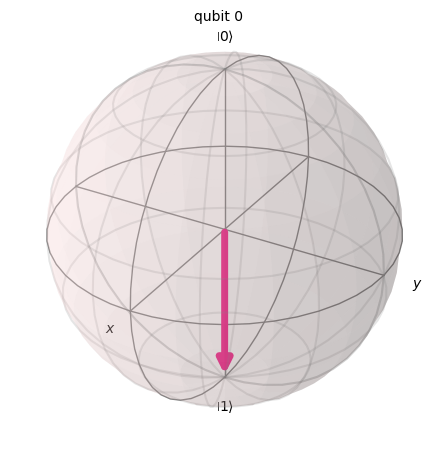

----------------------------------------------------------------------

|+⟩:
Coefficienti: α = 0.707+0.000j, β = 0.707+0.000j


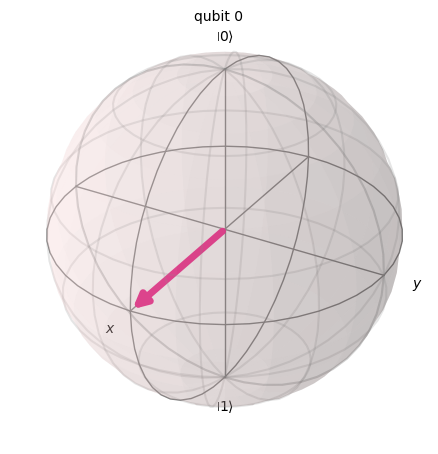

----------------------------------------------------------------------

|-⟩:
Coefficienti: α = 0.707+0.000j, β = -0.707+0.000j


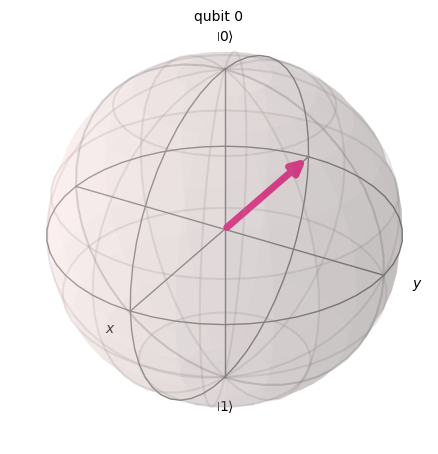

----------------------------------------------------------------------

|+i⟩:
Coefficienti: α = 0.707+0.000j, β = 0.000+0.707j


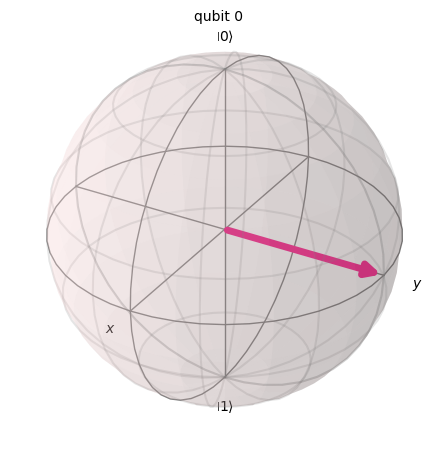

----------------------------------------------------------------------

|-i⟩:
Coefficienti: α = 0.707+0.000j, β = -0.000-0.707j


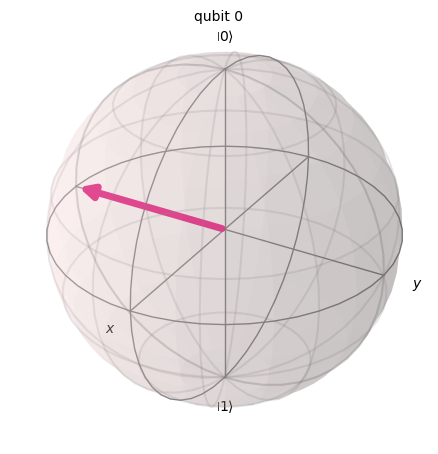

----------------------------------------------------------------------


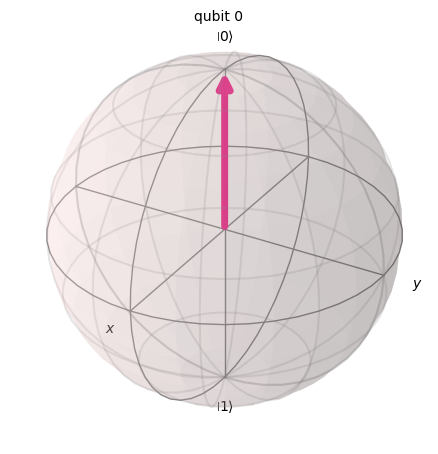

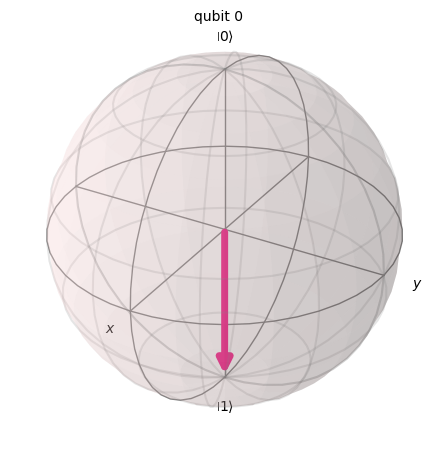

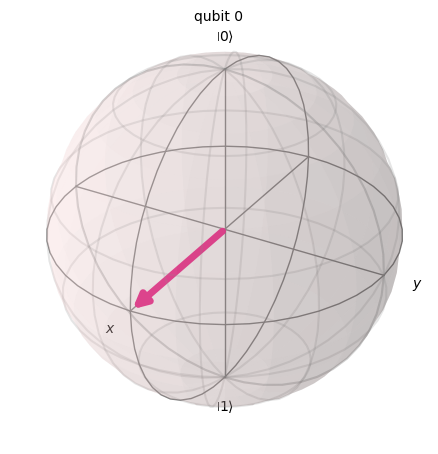

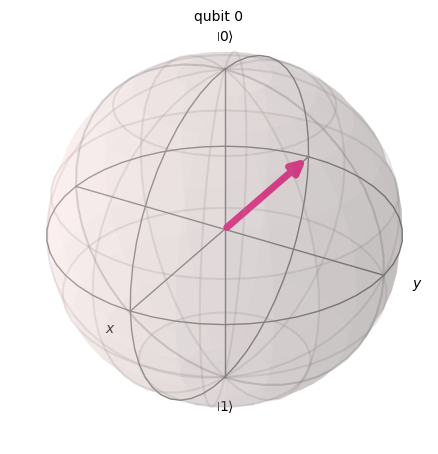

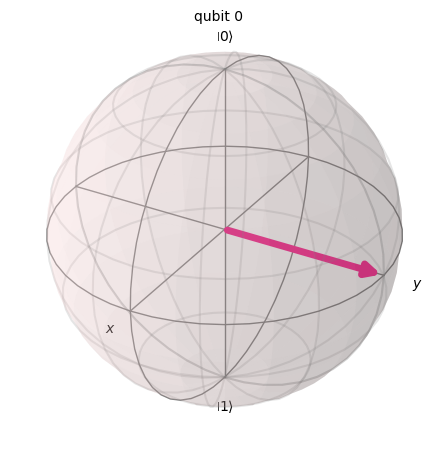

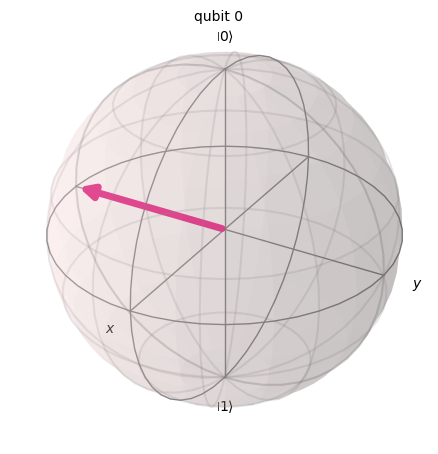

In [13]:
# Cella 11: Confronto visivo di più stati usando draw()
def compare_states_on_bloch(states_dict):
    """
    Confronta visivamente più stati usando il metodo draw().
    
    Parametri:
        states_dict: Dizionario {label: Statevector}
    """
    print("CONFRONTO STATI SULLA SFERA DI BLOCH")
    print("="*70)
    
    for label, state in states_dict.items():
        print(f"\n{label}:")
        print(f"Coefficienti: α = {state.data[0]:.3f}, β = {state.data[1]:.3f}")
        display(state.draw('bloch'))
        print("-"*70)

# Crea diversi stati
states = {
    '|0⟩': Statevector([1, 0]),
    '|1⟩': Statevector([0, 1]),
    '|+⟩': Statevector([1/np.sqrt(2), 1/np.sqrt(2)]),
    '|-⟩': Statevector([1/np.sqrt(2), -1/np.sqrt(2)]),
    '|+i⟩': Statevector([1/np.sqrt(2), 1j/np.sqrt(2)]),
    '|-i⟩': Statevector([1/np.sqrt(2), -1j/np.sqrt(2)])
}

compare_states_on_bloch(states)

EVOLUZIONE TEMPORALE DI UNO STATO
Rotazione RY da 0 a 2π attorno all'asse Y

Stato iniziale (angle=0):


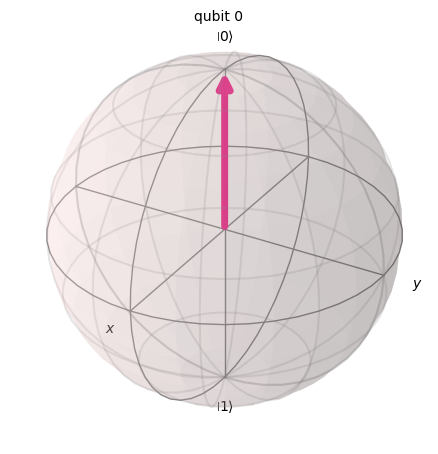


Step 1: RY(0.785 rad = 45°)
Coefficienti: α = 0.924+0.000j, β = 0.383+0.000j


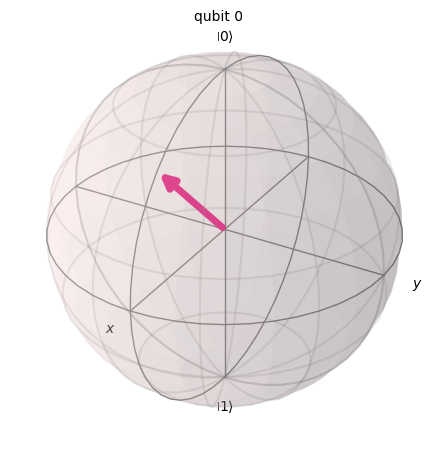


Step 2: RY(1.571 rad = 90°)
Coefficienti: α = 0.707+0.000j, β = 0.707+0.000j


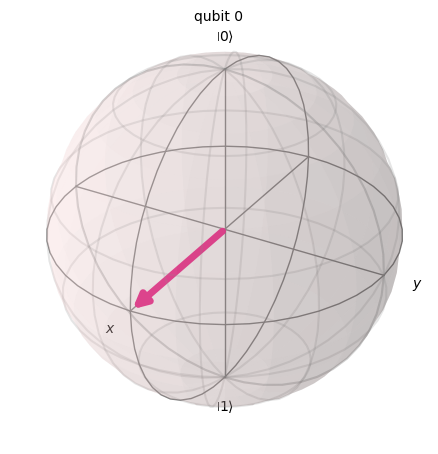


Step 3: RY(2.356 rad = 135°)
Coefficienti: α = 0.383+0.000j, β = 0.924+0.000j


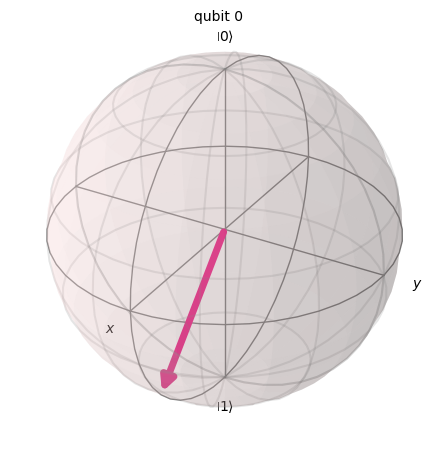


Step 4: RY(3.142 rad = 180°)
Coefficienti: α = 0.000+0.000j, β = 1.000+0.000j


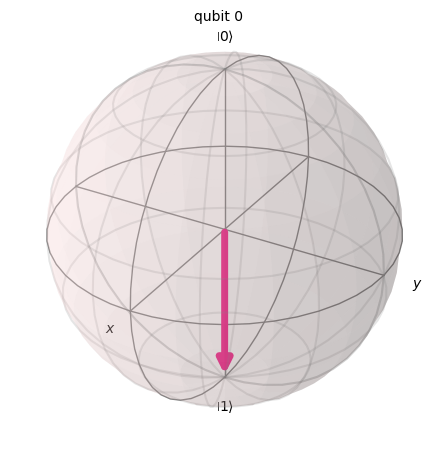


Step 5: RY(3.927 rad = 225°)
Coefficienti: α = -0.383+0.000j, β = 0.924+0.000j



Step 6: RY(4.712 rad = 270°)
Coefficienti: α = -0.707+0.000j, β = 0.707+0.000j


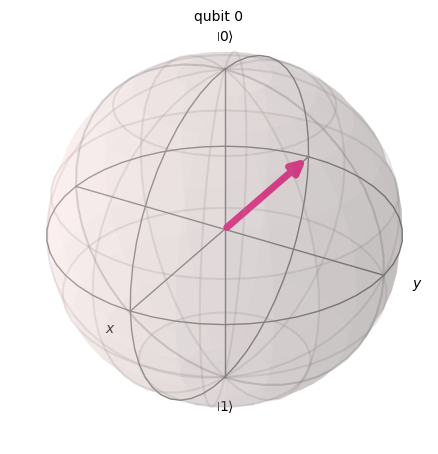


Step 7: RY(5.498 rad = 315°)
Coefficienti: α = -0.924+0.000j, β = 0.383+0.000j


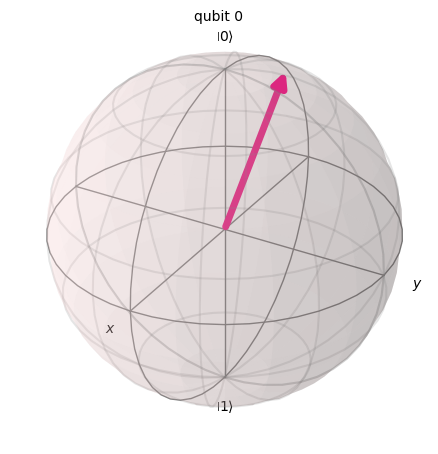


Step 8: RY(6.283 rad = 360°)
Coefficienti: α = -1.000+0.000j, β = 0.000+0.000j


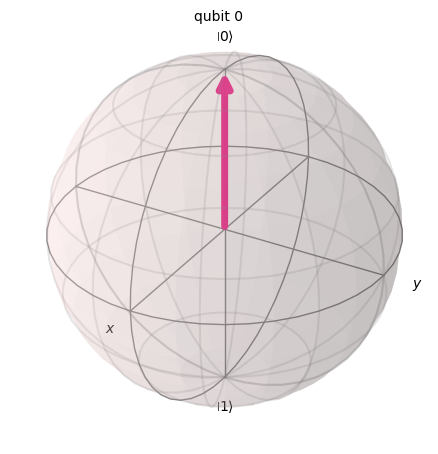

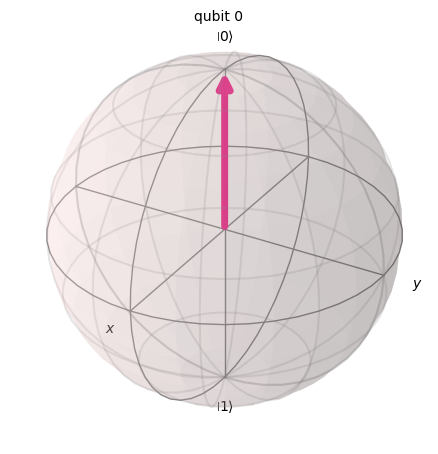

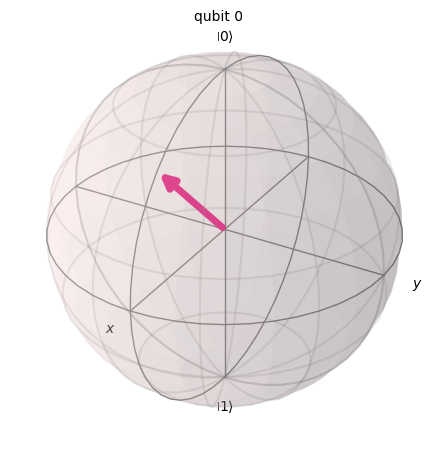

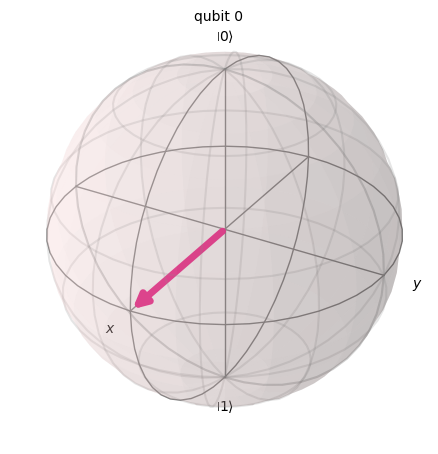

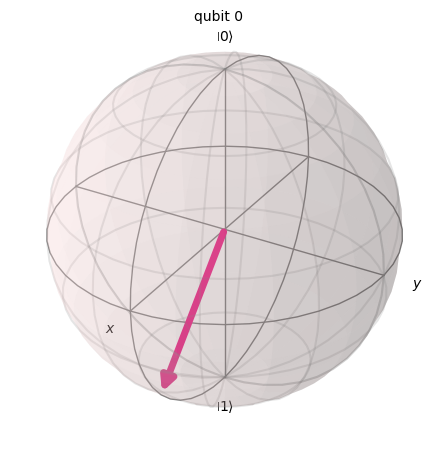

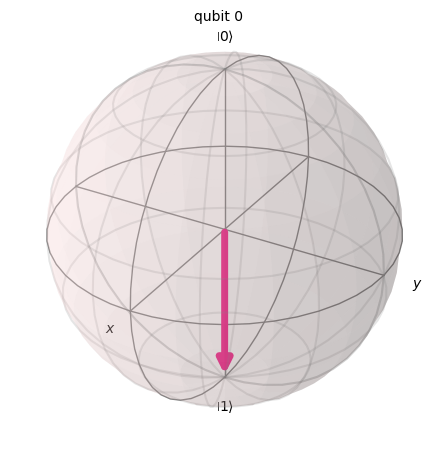

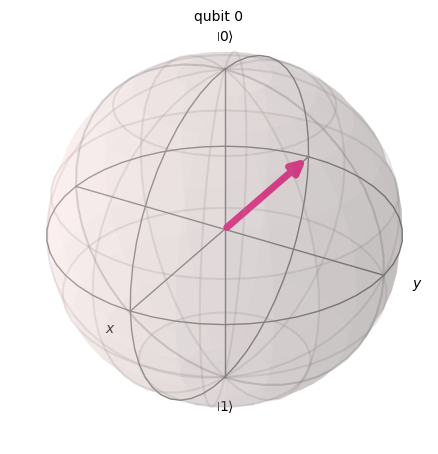

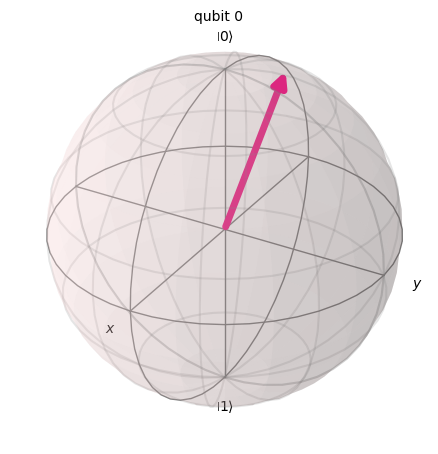

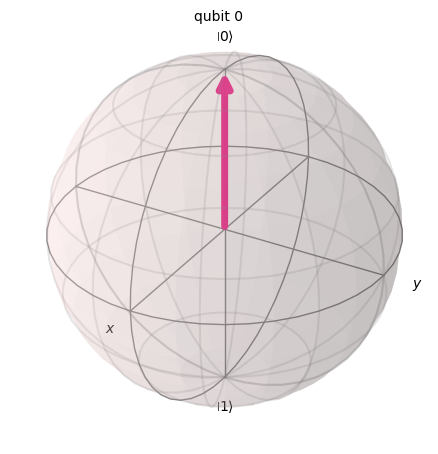

In [14]:
# Cella 12: Evoluzione di uno stato sulla sfera di Bloch (VERSIONE CORRETTA)
print("EVOLUZIONE TEMPORALE DI UNO STATO")
print("="*70)
print("Rotazione RY da 0 a 2π attorno all'asse Y\n")

# Stato iniziale
print("Stato iniziale (angle=0):")
state_0 = Statevector(QuantumCircuit(1))
display(state_0.draw('bloch'))

# Applica rotazioni progressive
angles = [np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]

for i, angle in enumerate(angles, 1):
    qc = QuantumCircuit(1)
    qc.ry(angle, 0)
    state = Statevector(qc)
    
    print(f"\nStep {i}: RY({angle:.3f} rad = {np.degrees(angle):.0f}°)")
    print(f"Coefficienti: α = {state.data[0]:.3f}, β = {state.data[1]:.3f}")
    display(state.draw('bloch'))

In [15]:
# Cella 13: Stato generico con slider interattivo
from ipywidgets import interact, FloatSlider

@interact(
    theta=FloatSlider(value=np.pi/4, min=0, max=np.pi, step=0.05, 
                     description='θ (rad):'),
    phi=FloatSlider(value=np.pi/4, min=0, max=2*np.pi, step=0.05, 
                   description='φ (rad):')
)
def interactive_state(theta, phi):
    """Widget interattivo per esplorare la sfera di Bloch."""
    alpha = np.cos(theta / 2)
    beta = np.exp(1j * phi) * np.sin(theta / 2)
    state = Statevector([alpha, beta])
    
    print(f"θ = {theta:.3f} rad ({np.degrees(theta):.1f}°)")
    print(f"φ = {phi:.3f} rad ({np.degrees(phi):.1f}°)")
    print(f"|ψ⟩ = ({alpha.real:.3f}{alpha.imag:+.3f}i)|0⟩ + ({beta.real:.3f}{beta.imag:+.3f}i)|1⟩")
    
    display(state.draw('bloch'))

interactive(children=(FloatSlider(value=0.7853981633974483, description='θ (rad):', max=3.141592653589793, ste…

DIVERSE RAPPRESENTAZIONI DI UNO STATO

1. Sfera di Bloch:


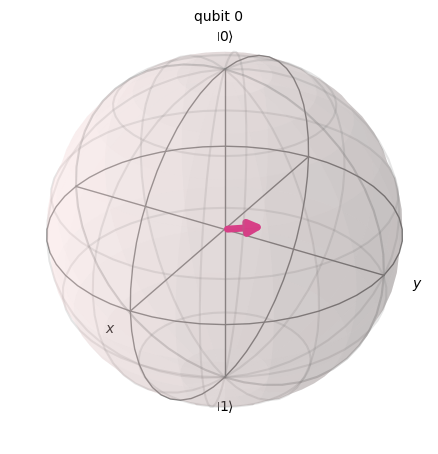


2. Notazione LaTeX:


<IPython.core.display.Latex object>


3. Rappresentazione testuale:


[0.8660254 +0.j        ,0.35355339+0.35355339j]


4. Q-sphere:


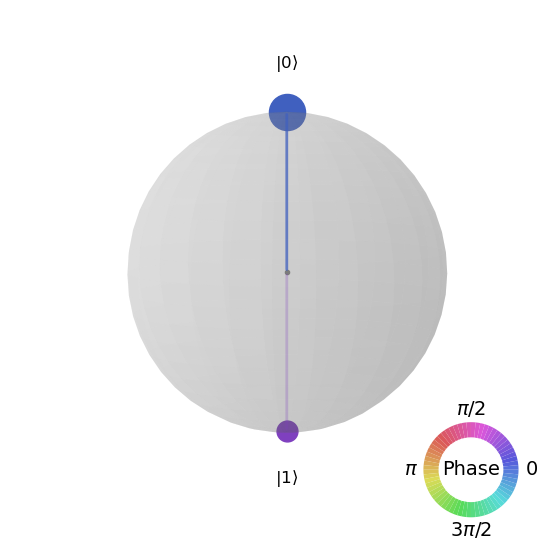


5. Hinton plot:


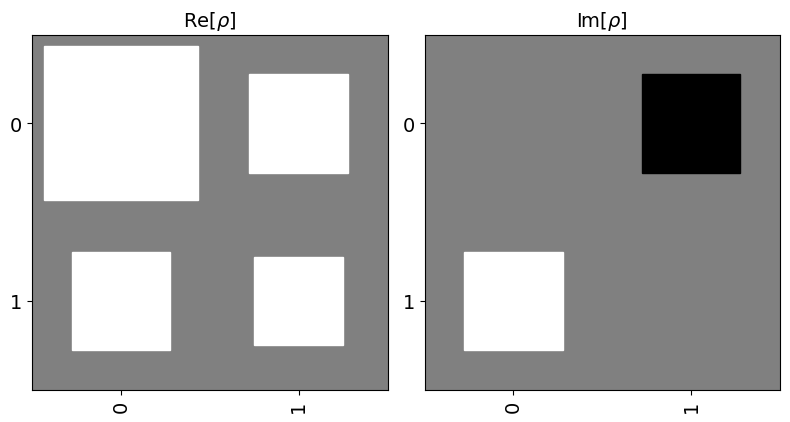


6. City plot:


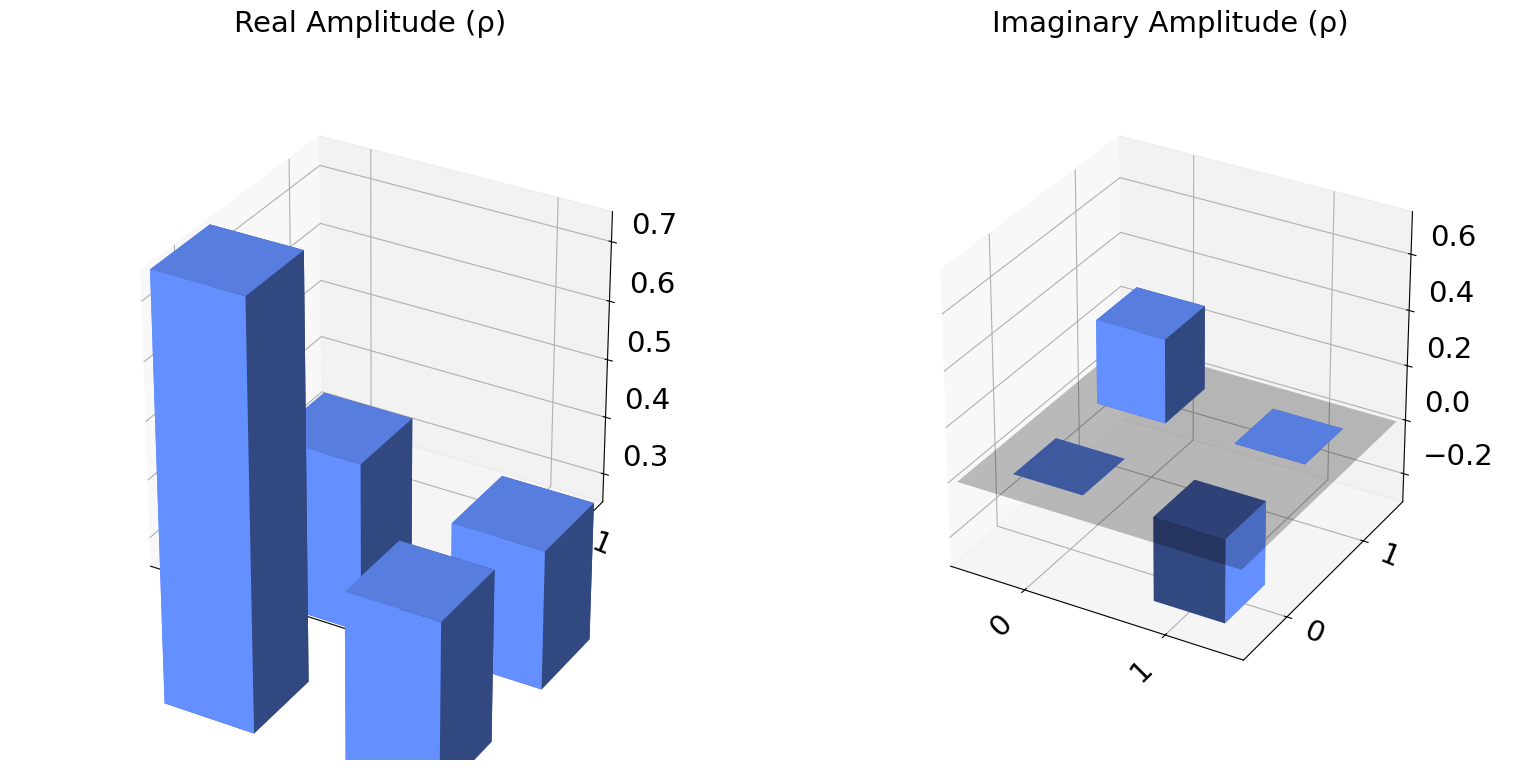

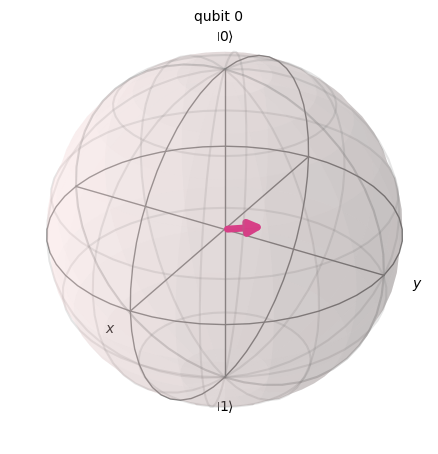

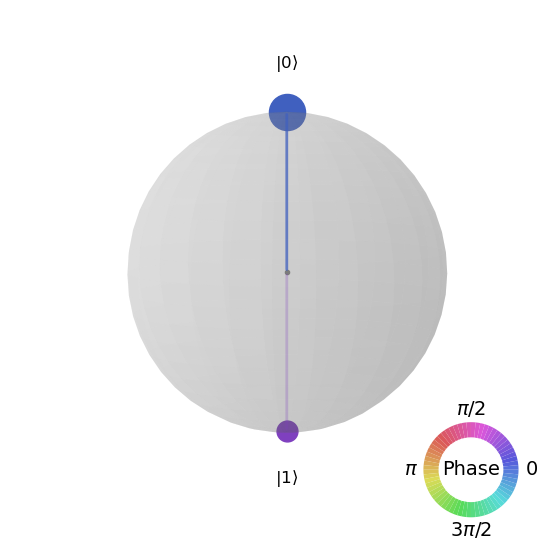

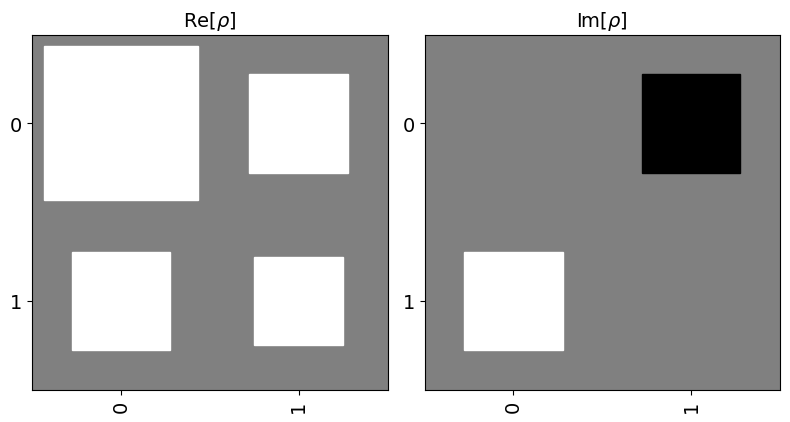

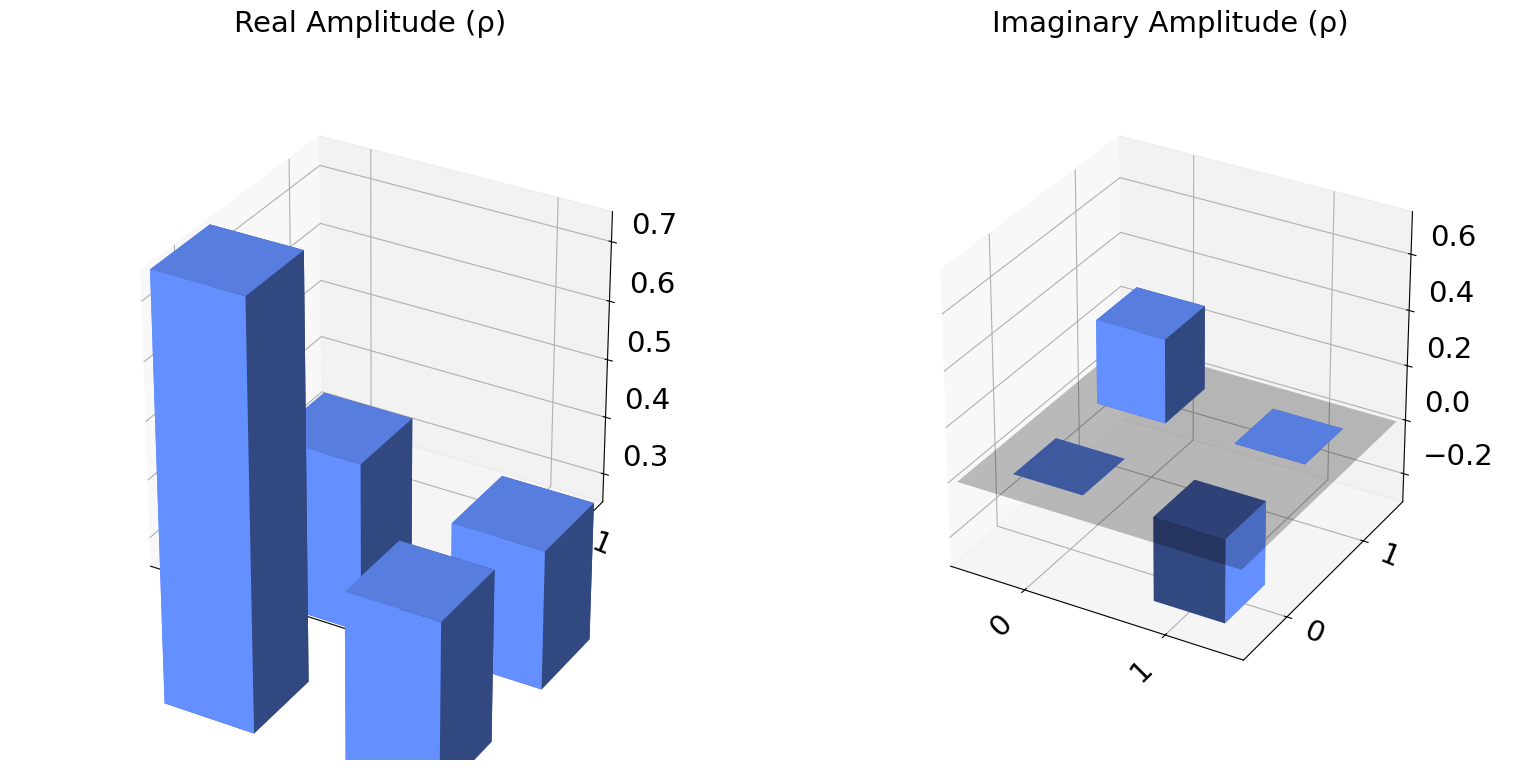

In [16]:
# Cella 14: Tutte le rappresentazioni disponibili di uno stato
print("DIVERSE RAPPRESENTAZIONI DI UNO STATO\n")

# Crea uno stato generico
theta, phi = np.pi/3, np.pi/4
alpha = np.cos(theta / 2)
beta = np.exp(1j * phi) * np.sin(theta / 2)
state = Statevector([alpha, beta])

print("1. Sfera di Bloch:")
display(state.draw('bloch'))

print("\n2. Notazione LaTeX:")
display(state.draw('latex'))

print("\n3. Rappresentazione testuale:")
display(state.draw('text'))

print("\n4. Q-sphere:")
display(state.draw('qsphere'))

print("\n5. Hinton plot:")
display(state.draw('hinton'))

print("\n6. City plot:")
display(state.draw('city'))

ESPLORAZIONE STATO: θ=1.047 rad, φ=0.785 rad

Circuito quantistico:


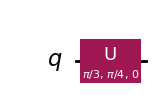


Coordinate sulla sfera di Bloch:
  x = 0.6124
  y = 0.6124
  z = 0.5000

Coefficienti dello stato:
  α = 0.8660+0.0000j
  β = 0.3536+0.3536j

Probabilità:
  P(|0⟩) = 0.7500
  P(|1⟩) = 0.2500

Visualizzazione sulla sfera di Bloch:


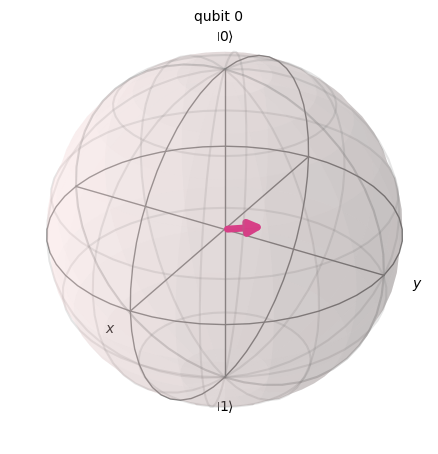

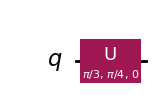

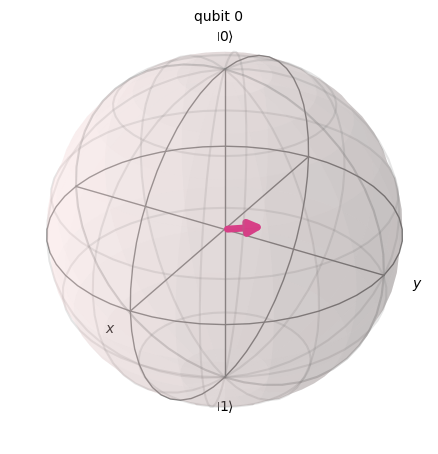

In [17]:
# Cella 15: Funzione completa per esplorare stati
def explore_bloch_state(theta, phi):
    """
    Funzione completa per esplorare uno stato sulla sfera di Bloch.
    Mostra circuito, stato e visualizzazioni multiple.
    """
    # Crea circuito
    qc = QuantumCircuit(1)
    qc.u(theta, phi, 0, 0)
    
    print("="*70)
    print(f"ESPLORAZIONE STATO: θ={theta:.3f} rad, φ={phi:.3f} rad")
    print("="*70)
    
    # Mostra circuito
    print("\nCircuito quantistico:")
    display(qc.draw('mpl'))
    
    # Ottieni stato
    state = Statevector(qc)
    
    # Coordinate Bloch
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    
    print(f"\nCoordinate sulla sfera di Bloch:")
    print(f"  x = {x:.4f}")
    print(f"  y = {y:.4f}")
    print(f"  z = {z:.4f}")
    
    # Coefficienti
    print(f"\nCoefficienti dello stato:")
    print(f"  α = {state.data[0]:.4f}")
    print(f"  β = {state.data[1]:.4f}")
    
    print(f"\nProbabilità:")
    print(f"  P(|0⟩) = {np.abs(state.data[0])**2:.4f}")
    print(f"  P(|1⟩) = {np.abs(state.data[1])**2:.4f}")
    
    # Visualizza sulla sfera di Bloch
    print("\nVisualizzazione sulla sfera di Bloch:")
    return state.draw('bloch')

# Esempio
explore_bloch_state(np.pi/3, np.pi/4)